In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt

In [2]:
#Checking current working directory
%pwd

'C:\\Users\\Akshay'

In [3]:
#Changing working directory 
%cd C:\Users\Akshay\Desktop\Data_Science\Final Project\Credit Card

C:\Users\Akshay\Desktop\Data_Science\Final Project\Credit Card


In [5]:
#Reading the Dataset
df=pd.read_excel('DataSet.xlsx')

In [6]:
df.head()

custid  region  townsize  gender  age  agecat birthmonth  ed  \
0  3964-QJWTRG-NPN       1       2.0       1   20       2  September  15   
1  0648-AIPJSP-UVM       5       5.0       0   22       2        May  17   
2  5195-TLUDJE-HVO       3       4.0       1   67       6       June  14   
3  4459-VLPQUH-3OL       4       3.0       0   23       2        May  16   
4  8158-SMTQFB-CNO       2       2.0       0   26       3       July  16   

   edcat  jobcat     ...       owncd  ownpda  ownpc  ownipod  owngame  ownfax  \
0      3       1     ...           0       0      0        1        1       0   
1      4       2     ...           1       1      1        1        1       1   
2      2       2     ...           1       0      0        0        0       0   
3      3       2     ...           1       0      1        1        1       0   
4      3       2     ...           1       0      1        0        1       0   

   news  response_01  response_02  response_03  
0     0            0            1            0  
1     1            0            0            0  
2     1            0            0            0  
3     1            1            0            0  
4     0            0            1            0  

[5 rows x 132 columns]

### Data Preprocessing and EDA


In [7]:
#custid variable is redundant variable so dropping it
df=df.drop('custid',axis=1)

In [9]:
pandas_profiling.ProfileReport(df)

In [8]:
df.shape

(5000, 131)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 131 entries, region to response_03
dtypes: float64(31), int64(99), object(1)
memory usage: 5.0+ MB


---Splitting given data into numerical and categorical data----

In [10]:
#Creating list for Categorical variable

cat_var=['region','townsize','gender','agecat','birthmonth','edcat','jobcat','union','employ','empcat','retire','inccat',
         'default','jobsat','marital','spousedcat','homeown','hometype','address','addresscat','cars','carown','cartype',
         'carcatvalue','carbought','carbuy','commute','commutecat','commutecar','commutemotorcycle','commutecarpool',
         'commutebus','commuterail','commutepublic','commutebike','commutewalk','commutenonmotor','telecommute','reason',
         'polview','polparty','polcontrib','vote','card','cardtype','cardbenefit','cardfee','cardtenure','cardtenurecat',
         'card2','card2type','card2benefit','card2fee','card2tenure','card2tenurecat','active','bfast','churn','tollfree',
         'equip','callcard','wireless','multline','voice','pager','internet','callid','callwait','forward','confer','ebill',
         'owntv','ownvcr','owndvd','owncd','ownpda','ownpc','ownipod','owngame','ownfax','news','response_01','response_02',
         'response_03']


In [11]:
# Variables in cat_var list

len(cat_var)


84

In [12]:
#Creating list for numerical variable

numerical_var=[]
for var in df.columns:
    if var not in cat_var:
        numerical_var.append(var)


In [13]:
#length of numerical_var list

len(numerical_var)

47

In [14]:
# Creating utility functions to update above variable list at any point of time while droping variables.

def list_update(var):
    if var in cat_var:
        cat_var.remove(var)
    elif var in numerical_var:
        numerical_var.remove(var)
    else:
        print ("This variable is not present in either of the list.")

            
# Function to drop all the vaariable in given list from main dataset i.e df.
def list_drop(listx):
    for var in listx:
        list_update(var)
        df.drop(var,axis=1,inplace=True)


Creating the response variable by adding cardspent and card2spent

In [15]:
df['total_spent']=df['cardspent']+df['card2spent']

Checking the distribution of response variable

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


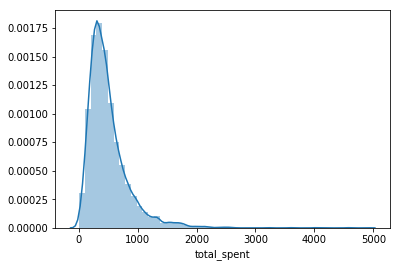

In [16]:
%matplotlib inline
import seaborn as sns
sns.distplot(df['total_spent'])

In [18]:
# Taking log of response variable to make it normally distributed and adding the variable to num_var

df['total_spent_ln']=np.log(df['total_spent'])


numerical_var.append(var)


list_drop(['total_spent','cardspent','card2spent'])

This variable is not present in either of the list.


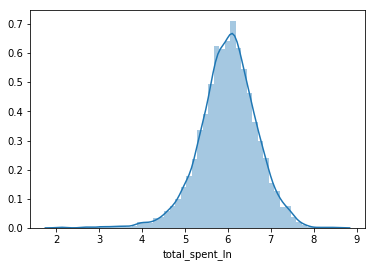

In [19]:
sns.distplot(df['total_spent_ln'])

### Checking for missing value

In [20]:
df.isnull().sum().value_counts()


0       115
2         3
3296      2
3656      2
2622      2
3         2
1         2
1422      1
1419      1
dtype: int64

total rows are 5000 and it is apparent some columns have more than 50% missing values.So dropping those columns

In [21]:
mis=df.isnull().sum()
print ("Variable with Percentage of Missing Value")
print ("-"*41)
totalx=5000.00
for var in mis.index:
    t=mis[var]/totalx
    t=t*100
    if t>= 25.00:
        # updating the numerical/categorical list..
        list_update(var)
        print ('{0}:{1}'.format(var,t))
        df.drop(var,axis=1,inplace=True)

print( "-"*41)
print ("These variable have been dropped")

Variable with Percentage of Missing Value
-----------------------------------------
lntollmon:52.44
lntollten:52.44
lnequipmon:65.92
lnequipten:65.92
lncardmon:28.38
lncardten:28.439999999999998
lnwiremon:73.11999999999999
lnwireten:73.11999999999999
-----------------------------------------
These variable have been dropped


### Exploratory Data Annalysis

In [22]:
df[numerical_var].describe().T

count        mean          std        min         25%  \
age             5000.0   47.025600    17.770338  18.000000   31.000000   
ed              5000.0   14.543000     3.281083   6.000000   12.000000   
income          5000.0   54.759600    55.377511   9.000000   24.000000   
lninc           5000.0    3.699909     0.747072   2.197225    3.178054   
debtinc         5000.0    9.954160     6.399783   0.000000    5.100000   
creddebt        5000.0    1.857326     3.415732   0.000000    0.385520   
lncreddebt      4999.0   -0.130454     1.273058  -6.597334   -0.952685   
othdebt         5000.0    3.654460     5.395172   0.000000    0.980301   
lnothdebt       4999.0    0.696915     1.128578  -4.092107   -0.018987   
spoused         5000.0    6.112800     7.743518  -1.000000   -1.000000   
reside          5000.0    2.204000     1.393977   1.000000    1.000000   
pets            5000.0    3.067400     3.414497   0.000000    0.000000   
pets_cats       5000.0    0.500400     0.860783   0.000000    0.000000   
pets_dogs       5000.0    0.392400     0.796084   0.000000    0.000000   
pets_birds      5000.0    0.110400     0.494227   0.000000    0.000000   
pets_reptiles   5000.0    0.055600     0.325776   0.000000    0.000000   
pets_small      5000.0    0.114600     0.568798   0.000000    0.000000   
pets_saltfish   5000.0    0.046600     0.469545   0.000000    0.000000   
pets_freshfish  5000.0    1.847400     3.074801   0.000000    0.000000   
carvalue        5000.0   23.232580    21.231637  -1.000000    9.200000   
commutetime     4998.0   25.345538     5.879149   8.000000   21.000000   
carditems       5000.0   10.177400     3.391140   0.000000    8.000000   
card2items      5000.0    4.666600     2.497017   0.000000    3.000000   
tenure          5000.0   38.204800    22.661888   0.000000   18.000000   
longmon         5000.0   13.471450    12.773381   0.900000    5.700000   
lnlongmon       5000.0    2.288779     0.775178  -0.105361    1.740466   
longten         4997.0  708.871753   979.291072   0.900000  104.600000   
lnlongten       4997.0    5.611298     1.649308  -0.105361    4.650144   
tollmon         5000.0   13.264450    16.310018   0.000000    0.000000   
tollten         5000.0  577.832510   949.151586   0.000000    0.000000   
equipmon        5000.0   12.991310    19.212943   0.000000    0.000000   
equipten        5000.0  470.176400   912.220624   0.000000    0.000000   
cardmon         5000.0   15.443850    15.007569   0.000000    0.000000   
cardten         4998.0  720.478391   922.225527   0.000000    0.000000   
wiremon         5000.0   10.701190    19.799837   0.000000    0.000000   
wireten         5000.0  421.984610  1001.003287   0.000000    0.000000   
hourstv         5000.0   19.645000     5.165609   0.000000   17.000000   
response_03     5000.0    0.102600     0.303466   0.000000    0.000000   

                       50%          75%           max  
age              47.000000    62.000000     79.000000  
ed               14.000000    17.000000     23.000000  
income           38.000000    67.000000   1073.000000  
lninc             3.637586     4.204693      6.978214  
debtinc           8.800000    13.600000     43.100000  
creddebt          0.926437     2.063820    109.072596  
lncreddebt       -0.076106     0.724665      4.692014  
othdebt           2.098540     4.314780    141.459150  
lnothdebt         0.741537     1.462053      4.952011  
spoused          -1.000000    14.000000     24.000000  
reside            2.000000     3.000000      9.000000  
pets              2.000000     5.000000     21.000000  
pets_cats         0.000000     1.000000      6.000000  
pets_dogs         0.000000     0.000000      7.000000  
pets_birds        0.000000     0.000000      5.000000  
pets_reptiles     0.000000     0.000000      6.000000  
pets_small        0.000000     0.000000      7.000000  
pets_saltfish     0.000000     0.000000      8.000000  
pets_freshfish    0.000000     4.000000     16.000000  
carvalue  

In [40]:
pandas_profiling.ProfileReport(df)

As we see some variables are highly correlated which can later add to multicollinearity.So dropping all these variables 

#Dropping only numerical variable for now as we want to create dummy variable for categorical variables

In [23]:
#Creating a dump list to add categorical variables in which which we will later drop
dump_list=[]

In [24]:
dump=['addresscat','agecat','card2tenure','commutecat','edcat','equipmon','inccat','lnlongten',
        'longten', 'spoused','spousedcat','tenure']


dplist=['addresscat','agecat','card2tenure','commutecat','edcat','equipmon','inccat','lnlongten',
            'longten', 'spoused','spousedcat','tenure']

print ("-"*41)
for var in dplist:
    if var in cat_var:
        dump_list.append(var)
    else:       
        print (var)
        list_update(var)
        df.drop(var,axis=1,inplace=True)
print ("-"*41)
print ("These variable have been dropped....")

-----------------------------------------
equipmon
lnlongten
longten
spoused
tenure
-----------------------------------------
These variable have been dropped....


#### Missing Value Treatment

In [25]:
for col in df:
    #get dtype for column
    dt = df[col].dtype 
    #check if it is a number
    if dt == int or dt == float:
        df[col].fillna(df[col].mean(),inplace=True)


In [26]:
df.isnull().sum().value_counts()

0    117
dtype: int64

#### Outlier Treatment

In [27]:
for col in df:
    #get dtype for column
    dt = df[col].dtype 
    #check if it is a number
    if dt == int or dt == float:
        df[col]=df[col].clip_upper(df[col].quantile(0.99))
        df[col]=df[col].clip_lower(df[col].quantile(0.01))


#### Dummy Variable Creation

In [28]:
from time import strptime
def tomonth(x):
    month_name= x
    month_number=strptime(month_name, '%B').tm_mon
    return month_number

df['birthmonth']=df['birthmonth'].map(lambda x: tomonth(x))

In [29]:
print (len(dump_list))
print ('Number of numerical variables  :{}'.format(len(numerical_var)))
print ('Number of categorical variables:{}'.format(len(cat_var)))

7
Number of numerical variables  :33
Number of categorical variables:84


In [30]:
# Dummy Creation is done on only these variables because remaning variables are already in dummy form..

cat_to_dum=['region','townsize','gender','agecat','edcat','empcat','inccat','jobsat','spousedcat',
         'hometype','addresscat','cars','carown','cartype','carcatvalue',
         'carbought','commutecat','reason','polview','card','cardtype','cardbenefit',
         'cardtenurecat','card2','card2type','card2benefit','card2tenurecat',
         'bfast','internet']

df['townsize']=df['townsize'].astype(int)
dum_var=[] #list of  newly created dummy variables.. 
for var in cat_to_dum:
    if var in df:
        col_dummies = pd.get_dummies(df[var], prefix=var+'_dummy')
        df=pd.concat([df,col_dummies],axis=1)
        if var not in dump_list:
            dump_list.append(var)
        for col in list(col_dummies.columns):
            dum_var.append(col)

In [31]:
print (len(dum_var))
print (len(cat_to_dum))
print (len(dump_list))
print ('Number of numerical variables  :{}'.format(len(numerical_var)))
print ('Number of categorical variables:{}'.format(len(cat_var)))
print (df.shape)

135
29
30
Number of numerical variables  :33
Number of categorical variables:84
(5000, 252)


#### Feature Reduction

In [32]:
# Droping all the variable accumulated in drop_list..
list_drop(dump_list)

In [33]:
dplist=['income','creddebt','othdebt']
#Droping these variables because log of these varibales are already present in the data.
# These are Redundant variables    
list_drop(dplist)

In [34]:
print (len(dum_var))
print (len(cat_to_dum))
print ('Number of numerical variables  :{}'.format(len(numerical_var)))
print ('Number of categorical variables:{}'.format(len(cat_var)))
print (df.shape)

135
29
Number of numerical variables  :30
Number of categorical variables:54
(5000, 219)


#### Correlation Matrix

In [35]:
df.corr()

age  birthmonth        ed    jobcat     union  \
age                     1.000000   -0.021043 -0.094560  0.037709  0.011206   
birthmonth             -0.021043    1.000000  0.010407 -0.001791  0.011360   
ed                     -0.094560    0.010407  1.000000 -0.072297  0.000594   
jobcat                  0.037709   -0.001791 -0.072297  1.000000  0.084778   
union                   0.011206    0.011360  0.000594  0.084778  1.000000   
employ                  0.703053   -0.016601 -0.215374  0.416472  0.034846   
retire                  0.567519   -0.004054 -0.093278  0.173736  0.016392   
lninc                   0.142984   -0.016194  0.206985  0.052658  0.008927   
debtinc                 0.039031   -0.018743  0.013376  0.003673 -0.004927   
lncreddebt              0.108046   -0.009247  0.129948  0.029627  0.010426   
lnothdebt               0.127005   -0.027143  0.154416  0.028717 -0.006542   
default                -0.394208    0.010625  0.110141 -0.086022 -0.017210   
marital                 0.003031    0.029219 -0.021444  0.003116 -0.004505   
reside                 -0.336149    0.018517  0.023230 -0.015512  0.004717   
pets                    0.027098   -0.030559  0.032212  0.011539  0.022246   
pets_cats               0.015496   -0.018928  0.010229 -0.020794 -0.021601   
pets_dogs               0.014604   -0.004291  0.028155 -0.001011 -0.007472   
pets_birds             -0.016220   -0.007731  0.008051  0.000805 -0.009560   
pets_reptiles           0.008047   -0.023573 -0.001301  0.007321  0.027364   
pets_small              0.003430    0.027319  0.008131  0.003773  0.002319   
pets_saltfish          -0.001318    0.008767  0.004737 -0.012601 -0.020488   
pets_freshfish          0.023293   -0.030178  0.022234  0.019218  0.034023   
homeown                -0.018264    0.006335  0.051206  0.028167  0.002338   
address                 0.822341   -0.015888 -0.056453  0.048441  0.001882   
carvalue                0.175760   -0.007476  0.158354  0.094823  0.004754   
carbuy                  0.019001   -0.017261 -0.003188 -0.006663  0.008234   
commute                 0.000507    0.004208  0.009807 -0.023440 -0.003893   
commutetime            -0.056299    0.017140 -0.008000 -0.005036 -0.004842   
commutecar             -0.013162   -0.012181  0.001895  0.025452 -0.005171   
commutemotorcycle      -0.007201   -0.000204  0.001093  0.002205  0.021038   
...                          ...         ...       ...       ...       ...   
cardtenurecat_dummy_2  -0.379941    0.015494  0.037067 -0.054806 -0.000099   
cardtenurecat_dummy_3  -0.203724    0.004505  0.057955 -0.044818  0.002608   
cardtenurecat_dummy_4  -0.055370   -0.010929  0.052220 -0.038097  0.006568   
cardtenurecat_dummy_5   0.633091   -0.016575 -0.087403  0.116259  0.001710   
card2_dummy_1           0.017971    0.022764  0.101442 -0.020138 -0.006522   
card2_dummy_2           0.000839    0.001672 -0.033409  0.004619  0.002912   
card2_dummy_3          -0.025772   -0.006611 -0.033588 -0.005113 -0.009060   
card2_dummy_4           0.008067   -0.013975  0.075163  0.011533  0.021924   
card2_dummy_5           0.004315   -0.001486 -0.156180  0.011481 -0.015780   
card2type_dummy_1      -0.029993    0.007758  0.024253  0.013766  0.004227   
card2type_dummy_2      -0.007376   -0.001236 -0.016341 -0.003925  0.022354   
card2type_dummy_3       0.004250   -0.002226  0.017066 -0.018908 -0.014231   
card2type_dummy_4       0.032009   -0.004093 -0.024238  0.009156 -0.011950   
card2benefit_dummy_1    0.014484   -0.025559  0.019993  0.015243  0.007776   
card2benefit_dummy_2   -0.002575    0.009221 -0.000894 -0.009498  0.010594   
card2benefit_dummy_3    0.000878    0.011430 -0.025146  0.008926 -0.000566   
card2benefit_dummy_4   -0.012493    0.004513  0.006453 -0.014485 -0.017403   
card2tenurecat_dummy_1 -0.336647    0.010995 -0.041056 -0.035294 -0.013280   
card2tenurecat_dummy_2 -0.375828    0.011462  0.054736 -0.055173 -0.001487   
card2tenurecat_dummy_3 -0.148557   -0.001954  0.063

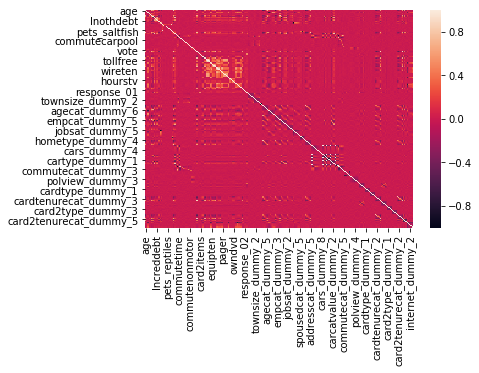

In [36]:
sns.heatmap(df.corr())

#### Splitting the data

In [37]:

from sklearn.model_selection import train_test_split 
feature_columns = df.columns.difference( ['total_spent_ln'] )
train_X, test_X, train_y, test_y = train_test_split(df[feature_columns],
                                                  df['total_spent_ln'],
                                                  test_size=0.3,
                                                  random_state=125)
print (len( train_X) )
print (len (train_y))
print (len( test_X))
print (len( test_y))
print (df.shape)
3500

3500
3500
1500
1500
(5000, 219)


3500

#### Building Models

#### 1. Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(train_X, train_y)
y_pred=lr.predict(test_X)
score=round(lr.score(test_X,test_y) * 100, 2)
print ('score:'+str(score) + ' percent')

score:66.5 percent


In [39]:
score_train=round(lr.score(train_X, train_y) * 100, 2)
print (('score:'+str(score_train) + ' percent'))

score:71.38 percent


In [40]:
from sklearn import metrics as m

In [41]:
print ('MSE: ',m.mean_squared_error(y_pred,test_y))
print ('RMSE:',np.sqrt(m.mean_squared_error(y_pred,test_y)))
print ('MAPE: ',(m.mean_absolute_error(y_pred,test_y)*100).round(2))

MSE:  0.13529542535764524
RMSE: 0.3678252647081835
MAPE:  29.27


#### 2.Random Forrest Model

In [42]:
from sklearn.ensemble import RandomForestRegressor 

In [43]:
rf= RandomForestRegressor(n_estimators=100)
rf.fit(train_X, train_y)
y_pred_rf= rf.predict(test_X)
score_rf = round(rf.score(test_X,test_y) * 100, 2)
print (str(score_rf) + ' percent')

67.12 percent


#### 3. Decision Tree Model

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
dt=DecisionTreeRegressor()
dt.fit(train_X, train_y)
y_pred_dt= dt.predict(test_X)
score_dt = round( dt.score(test_X, test_y) * 100, 2)
print (str(score_dt) + ' percent')

27.85 percent


### Comparing Models

In [46]:
model_df = pd.DataFrame({
    'Model': ['Linear Regression','Decision Tree', 'Random Forest'],
    
    'Score': [score,score_dt,score_rf]
    })

model_df.sort_values(by='Score', ascending=False)

Model  Score
2      Random Forest  67.12
0  Linear Regression  66.50
1      Decision Tree  27.85

### Final Model

In [48]:
import statsmodels.api as sm

In [49]:
lm=sm.OLS(train_y,train_X).fit()

In [50]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         total_spent_ln   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     45.19
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        20:27:06   Log-Likelihood:                -1263.2
No. Observations:                3500   AIC:                             2894.
Df Residuals:                    3316   BIC:                             4028.
Df Model:                         183                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
active                     0.0068      0.013      0.515      0.606      -0.019       0.032
address                    0.0015      0.002      0.824      0.410      -0.002       0.005
addresscat_dummy_1         0.1164      0.035      3.316      0.001       0.048       0.185
addresscat_dummy_2         0.1384      0.023      6.085      0.000       0.094       0.183
addresscat_dummy_3         0.1197      0.016      7.407      0.000       0.088       0.151
addresscat_dummy_4         0.0913      0.020      4.584      0.000       0.052       0.130
addresscat_dummy_5         0.0695      0.037      1.853      0.064      -0.004       0.143
age                       -0.0040      0.002     -2.165      0.030      -0.008      -0.000
agecat_dummy_2             0.0146      0.044      0.334      0.738      -0.071       0.101
agecat_dummy_3             0.0549      0.028      1.990      0.047       0.001       0.109
agecat_dummy_4             0.0932      0.017      5.472      0.000       0.060       0.127
agecat_dummy_5             0.1605      0.028      5.799      0.000       0.106       0.215
agecat_dummy_6             0.2120      0.048      4.454      0.000       0.119       0.305
bfast_dummy_1              0.1914      0.015     12.659      0.000       0.162       0.221
bfast_dummy_2              0.1566      0.017      9.434      0.000       0.124       0.189
bfast_dummy_3              0.1873      0.015     12.838      0.000       0.159       0.216
birthmonth                 0.0027      0.002      1.512      0.131      -0.001       0.006
callcard                  -0.0167      0.022     -0.762      0.446      -0.060       0.026
callid                     0.0196      0.019      1.052      0.293      -0.017       0.056
callwait                   0.0019      0.018      0.105      0.916      -0.034       0.038
carbought_dummy_-1         0.1431      0.013     10.997      0.000       0.118       0.169
carbought_dummy_0          0.1890      0.015     12.201      0.000       0.159       0.219
carbought_dummy_1          0.2032      0.016     13.063      0.000       0.173       0.234
carbuy                     0.0037      0.013      0.275      0.783      -0.023       0.030
carcatvalue_dummy_-1       0.1431      0.013     10.997      0.000       0.118       0.169
carcatvalue_dummy_1        0.1141      0.022      5.076      0.000       0.070       0.158
carcatvalue_dummy_2        0.1115      0.016      6.844      0.000       0.080       0.143
carcatvalue_dummy_3        0.1666      0.031      5.448      0.000       0.107       0.227
card2_dummy_1              0.3295      0.016     20.402      0.000       0.298       0.361
card2_dummy_2              0.0558      0.015      3.848      0.000       0.027       0.084
card2_dummy_3              0.0243      0.014      1.731      0.083      -0.003  

## Feature Importances

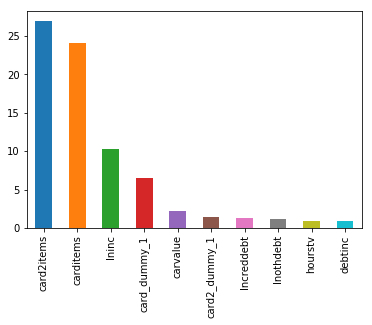

In [52]:
#These are the driving factors for total credit card spend

ce=pd.DataFrame(rf.feature_importances_, train_X.columns)
ce.columns=['Coefficients']
ce.sort_values('Coefficients',ascending=False,inplace=True)
ce['Coefficients']=((ce['Coefficients'])*100).round(2)
ce=ce.head(10)
ce=ce.head(10)
ce.Coefficients.plot(kind='bar')